In [1]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 27.1 MB/s eta 0:00:00


In [2]:
! apt-get update
! apt install -y chromium-driver

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [45.2 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,560 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-securi

In [3]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 20.3 MB/s eta 0:00:00


In [16]:
from selenium import webdriver

# Set up WebDriver options
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('start-maximized')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

# Initialize WebDriver
driver = webdriver.Chrome(options=options)

In [5]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
import time

## just scraping text and images in its original position


In [ ]:
try:
    url = "https://www.yhdfa.vn/product/E/A01/SAD01-22?productModel="
    driver.get(url)

    # Wait for the page to load completely
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "body"))
    )

    # Extract all elements (text and images) in order of appearance
    body = driver.find_element(By.TAG_NAME, "body")
    elements = body.find_elements(By.XPATH, ".//*")  # Get all elements in the DOM

    for element in elements:
        # Check for text content
        if element.tag_name in ['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'span', 'div']:
            text_content = element.text.strip()
            if text_content:
                print(f"Text: {text_content}")

        # Check for images
        elif element.tag_name == 'img':
            img_src = element.get_attribute("src")
            img_alt = element.get_attribute("alt")
            if img_src:
                print(f"Image: {img_src}")
                if img_alt:
                    print(f"  Alt Text: {img_alt}")

finally:
    driver.quit()


Text: Tel: (84) 0987-918-001 Email: vn@dgyiheda.com Mon-Fir 7 am- 5 pm
Sign In
Register
Cart
0
Help
Down
Timing Pulley
Timing Belt
Screw
Single Axis Driver
Product category
Home/
Product Category /
Linear motion /
Shafts /
Shafts Straight Type Standard g6
Shafts Straight Type Standard g6 View the parameters
Parameter selection：
Material
Surface Treatment
The product configuration：
Code
D
L
8~1500/1
Product model：
-
Price: --
Sum: --
Lead time: --
Different product input different quantity can get corresponding discount.
Amount:
PCS
Order
Add to cart
Reset the parameters Download PDF 3D model Download Exchange Rate
DetailAvaliable machining parameters3D model preview
Material drawing
split
parameter
Selection table
Text: Tel: (84) 0987-918-001 Email: vn@dgyiheda.com Mon-Fir 7 am- 5 pm
Sign In
Register
Cart
0
Help
Down
Timing Pulley
Timing Belt
Screw
Single Axis Driver
Product category
Home/
Product Category /
Linear motion /
Shafts /
Shafts Straight Type Standard g6
Shafts Straight Type

## OCR images using EasyOCR

### just testing direct OCR in scraped images

In [ ]:
# Function to download and process image from URL
def ocr_from_image_url2(image_url):
    try:
        # Download the image
        response = requests.get(image_url)
        img = Image.open(BytesIO(response.content))

        # Use EasyOCR to extract text from the image
        result = reader.readtext(img)

        # Extract and return text
        extracted_text = ' '.join([text[1] for text in result])
        return extracted_text
    except Exception as e:
        return f"Error processing image {image_url}: {e}\nNo text found in image."


In [ ]:
# Scrape text and images in original order
def scrape_content_in_order(url):
    try:
        driver.get(url)

        # Extract all text content
        page_text = driver.find_element(By.TAG_NAME, "body").text

        # Extract image sources
        images = driver.find_elements(By.TAG_NAME, "img")
        image_data = []
        for img in images:
            image_url = img.get_attribute("src")
            image_data.append(image_url)

        # Format and print content
        page_lines = page_text.splitlines()
        content_index = 0

        formatted_output = ""

        for line in page_lines:
            line = line.strip()
            if line:
                formatted_output += f"{line}\n"

                # Check if there's an image to process after this line
                if content_index < len(image_data):
                    image_url = image_data[content_index]
                    ocr_result = ocr_from_image_url(image_url)
                    formatted_output += f"---\nExtracting text from image: {image_url}\n{ocr_result}\n---\n"
                    content_index += 1

        # Print the formatted output
        print(formatted_output)

    finally:
        driver.quit()

url = "https://www.yhdfa.vn/product/E/A01/SAD01-22?productModel="  
scrape_content_in_order(url)

Error processing image https://image.yhdfa.vn//Image/Goods/A01/SAD01-22-A.jpg: cannot identify image file <_io.BytesIO object at 0x7b60af71aa70>
Error processing image https://image.yhdfa.vn//Image/Goods/A01/SAD01-22-A.jpg: cannot identify image file <_io.BytesIO object at 0x7b6183bcec00>
Error processing image https://image.yhdfa.vn//Image/Goods/A01/SAD01-22-B.jpg: cannot identify image file <_io.BytesIO object at 0x7b60af5975b0>
Error processing image https://image.yhdfa.vn//Image/Goods/A01/SAD01-22-C1.jpg: cannot identify image file <_io.BytesIO object at 0x7b60af5a44f0>
Error processing image https://dgyhdzdhgfyxgs2.qiyukf.net/c34388296018033e0080c5437150d742.png: Invalid input type. Supporting format = string(file path or url), bytes, numpy array
Error processing image https://qiyukf.nosdn.127.net/sdk/res/kefu/custom/1.png: Invalid input type. Supporting format = string(file path or url), bytes, numpy array
Error processing image https://qiyukf.nosdn.127.net/sdk/res/kefu/custom/1.

# New approach (selenium scrape, use matplotlib to grayscale, plot downloaded images and easyOCR to extract text)

In [7]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from easyocr import Reader
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Initialize EasyOCR reader
reader = Reader(['en'], gpu=False)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [8]:
# Function to download, process, and display image
def process_and_display_image(image_url):
    try:
        # Download the image
        response = requests.get(image_url, stream=True)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))

        # Convert image to array for OpenCV processing
        img_array = np.array(img)

        # Convert to grayscale
        gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

        # Apply thresholding
        _, binary_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Display the original and preprocessed image
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(binary_img, cmap='gray')
        plt.title("Grayscale Processed Image")
        plt.axis('off')
        plt.show()

        # Perform OCR using EasyOCR
        result = reader.readtext(binary_img)
        extracted_text = ' '.join([text[1] for text in result])
        return extracted_text

    except Exception as e:
        return f"Error processing image {image_url}: {e}"

Text: Tel: (84) 0987-918-001 Email: vn@dgyiheda.com Mon-Fir 7 am- 5 pm
Sign In
Register
Cart
0
Help
Down
Timing Pulley
Timing Belt
Screw
Single Axis Driver
Product category
Home/
Product Category /
Linear motion /
Shafts /
Shafts Straight Type Standard g6
Shafts Straight Type Standard g6 View the parameters
Parameter selection：
Material
Surface Treatment
The product configuration：
Code
D
L
8~1500/1
Product model：
-
Price: --
Sum: --
Lead time: --
Different product input different quantity can get corresponding discount.
Amount:
PCS
Order
Add to cart
Reset the parameters Download PDF 3D model Download Exchange Rate
DetailAvaliable machining parameters3D model preview
Material drawing
split
parameter
Selection table
Text: Tel: (84) 0987-918-001 Email: vn@dgyiheda.com Mon-Fir 7 am- 5 pm
Sign In
Register
Cart
0
Help
Down
Timing Pulley
Timing Belt
Screw
Single Axis Driver
Product category
Home/
Product Category /
Linear motion /
Shafts /
Shafts Straight Type Standard g6
Shafts Straight Type

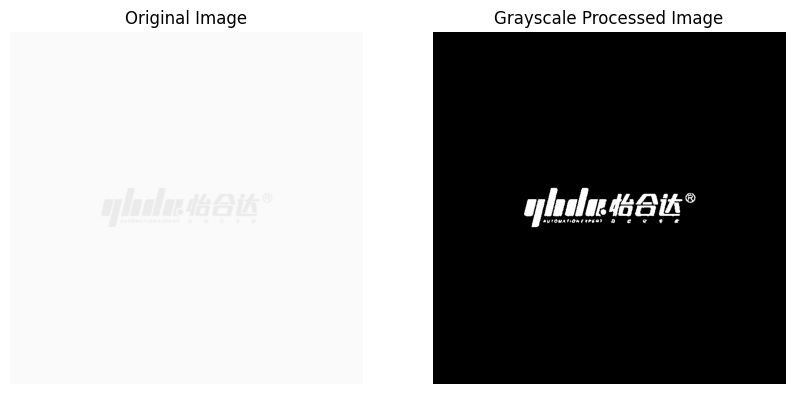

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


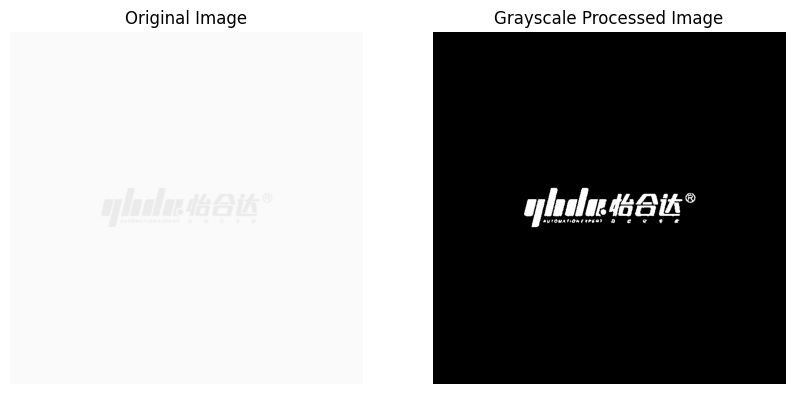

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


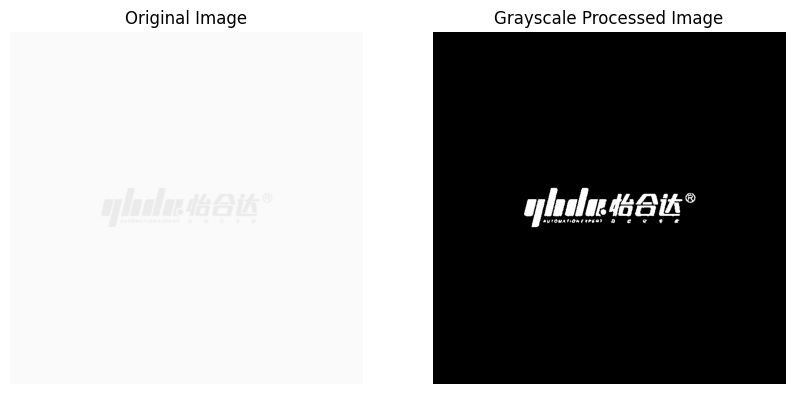

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


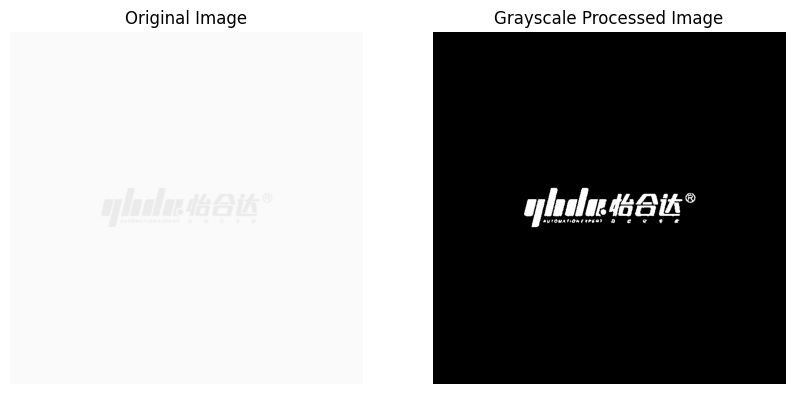

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


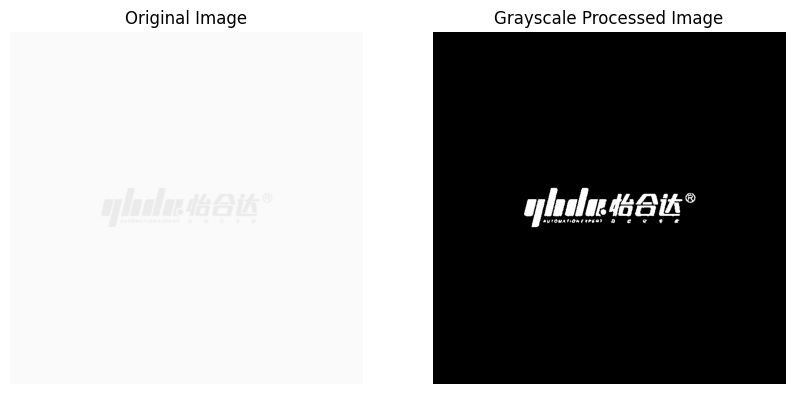

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


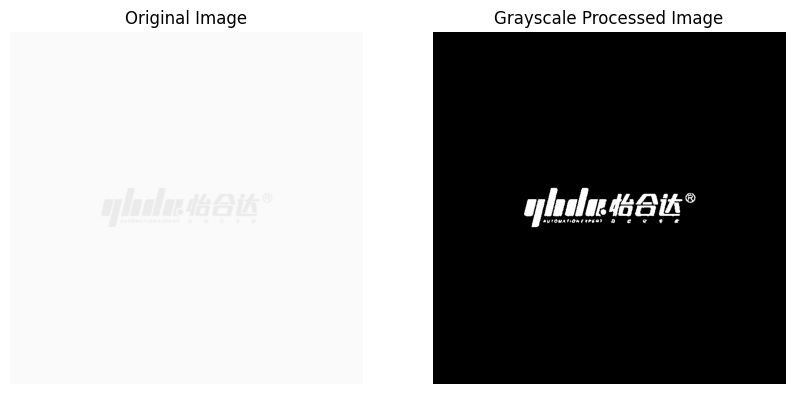

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


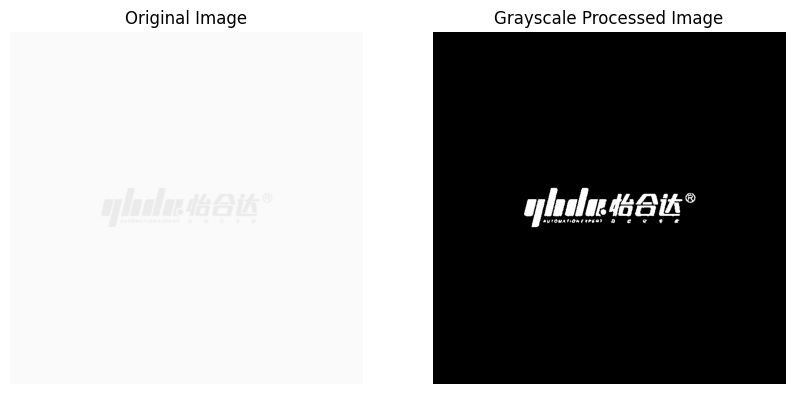

OCR Result: 'lslukt68it
---
Image Found: https://dgyhdzdhgfyxgs2.qiyukf.net/c34388296018033e0080c5437150d742.png


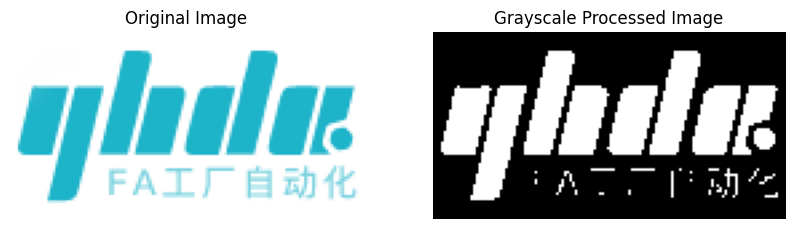

OCR Result: Yghtlge 4J"
---
Image Found: https://qiyukf.nosdn.127.net/sdk/res/kefu/custom/1.png


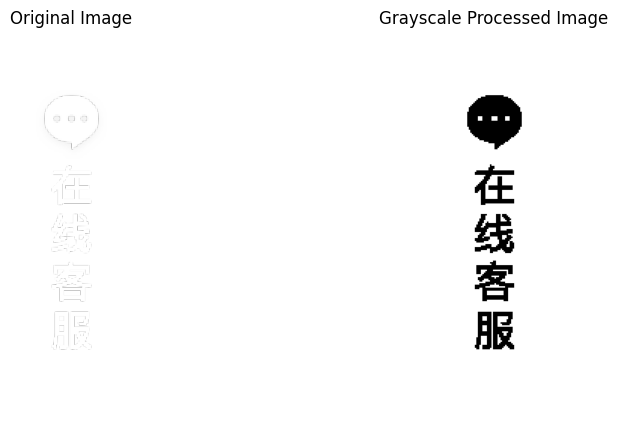

OCR Result: 1
---
Image Found: https://qiyukf.nosdn.127.net/sdk/res/kefu/custom/1.png


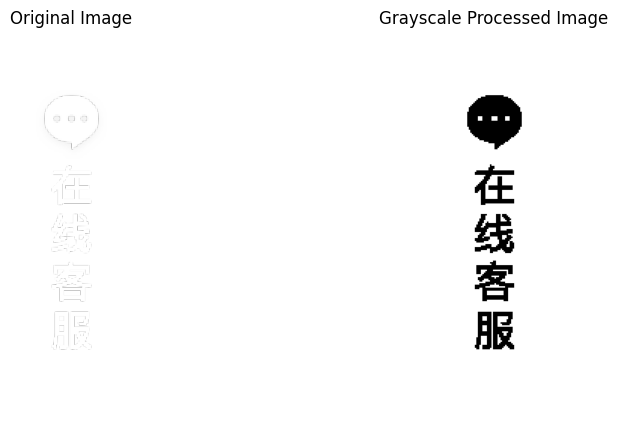

OCR Result: 1
---


In [12]:
# Function to scrape and process content
def scrape_content_in_order(url):
    try:
        driver.get(url)

        # Wait for the page to load
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.TAG_NAME, "body"))
        )

        # Get all text and images in DOM order
        body = driver.find_element(By.TAG_NAME, "body")
        elements = body.find_elements(By.XPATH, ".//*")

        for element in elements:
            # Handle text elements
            if element.tag_name in ['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'span', 'div']:
                text_content = element.text.strip()
                if text_content:
                    print(f"Text: {text_content}")

            # Handle image elements
            elif element.tag_name == 'img':
                image_url = element.get_attribute("src")
                if image_url:
                    print(f"Image Found: {image_url}")
                    ocr_result = process_and_display_image(image_url)
                    print(f"OCR Result: {ocr_result}\n---")

    finally:
        driver.quit()

url = "https://www.yhdfa.vn/product/E/A01/SAD01-22?productModel="
scrape_content_in_order(url)

## With headers to bypass image download and connection error (mimicing original website)

In [13]:
def process_and_display_image(image_url):
    try:
        # Custom headers
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
            "Referer": "https://www.yhdfa.vn",  # Referer header to mimic the original website
        }
        response = requests.get(image_url, headers=headers, stream=True)
        response.raise_for_status()  # Check for HTTP errors

        img = Image.open(BytesIO(response.content))

        # Convert image to array for OpenCV processing
        img_array = np.array(img)

        # Convert to grayscale
        gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

        # Apply thresholding
        _, binary_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Display the original and preprocessed image
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(binary_img, cmap='gray')
        plt.title("Grayscale Processed Image")
        plt.axis('off')
        plt.show()

        # Perform OCR using EasyOCR
        result = reader.readtext(binary_img)
        extracted_text = ' '.join([text[1] for text in result])
        return extracted_text

    except Exception as e:
        return f"Error processing image {image_url}: {e}"


Text: Tel: (84) 0987-918-001 Email: vn@dgyiheda.com Mon-Fir 7 am- 5 pm
Sign In
Register
Cart
0
Help
Down
Timing Pulley
Timing Belt
Screw
Single Axis Driver
Product category
Home/
Product Category /
Linear motion /
Shafts /
Shafts Straight Type Standard g6
Shafts Straight Type Standard g6 View the parameters
Parameter selection：
Material
Surface Treatment
The product configuration：
Code
D
L
8~1500/1
Product model：
-
Price: --
Sum: --
Lead time: --
Different product input different quantity can get corresponding discount.
Amount:
PCS
Order
Add to cart
Reset the parameters Download PDF 3D model Download Exchange Rate
DetailAvaliable machining parameters3D model preview
Material drawing
split
parameter
Selection table
Text: Tel: (84) 0987-918-001 Email: vn@dgyiheda.com Mon-Fir 7 am- 5 pm
Sign In
Register
Cart
0
Help
Down
Timing Pulley
Timing Belt
Screw
Single Axis Driver
Product category
Home/
Product Category /
Linear motion /
Shafts /
Shafts Straight Type Standard g6
Shafts Straight Type

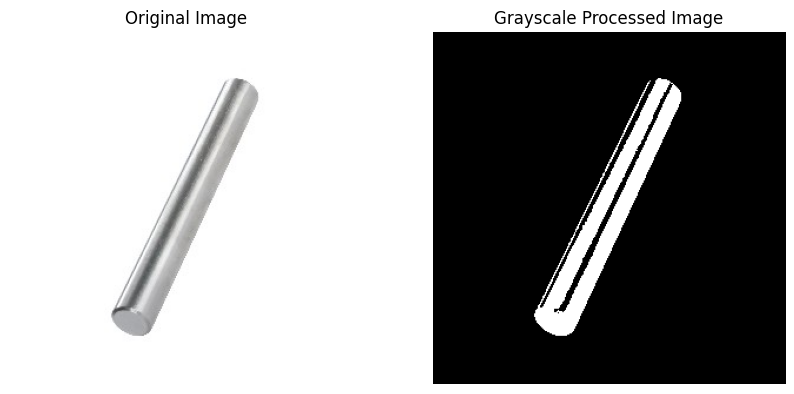

OCR Result: 
---
Image Found: https://image.yhdfa.vn//Image/Goods/A01/SAD01-22-A.jpg


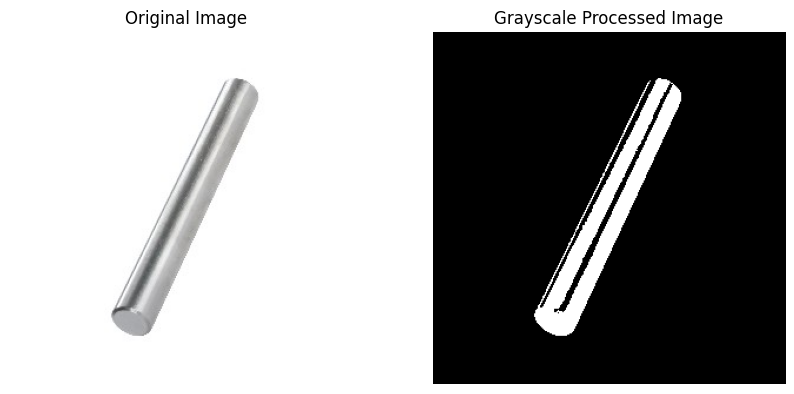

OCR Result: 
---
Text: Shafts Straight Type Standard g6 View the parameters
Parameter selection：
Material
Surface Treatment
The product configuration：
Code
D
L
8~1500/1
Product model：
-
Price: --
Sum: --
Lead time: --
Different product input different quantity can get corresponding discount.
Amount:
PCS
Order
Add to cart
Reset the parameters Download PDF 3D model Download Exchange Rate
Text: Shafts Straight Type Standard g6 View the parameters
Parameter selection：
Material
Surface Treatment
The product configuration：
Code
D
L
8~1500/1
Product model：
-
Price: --
Sum: --
Lead time: --
Different product input different quantity can get corresponding discount.
Amount:
PCS
Order
Add to cart
Reset the parameters Download PDF 3D model Download Exchange Rate
Text: Shafts Straight Type Standard g6 View the parameters
Parameter selection：
Material
Surface Treatment
The product configuration：
Code
D
L
8~1500/1
Product model：
-
Price: --
Sum: --
Lead time: --
Different product input different quan

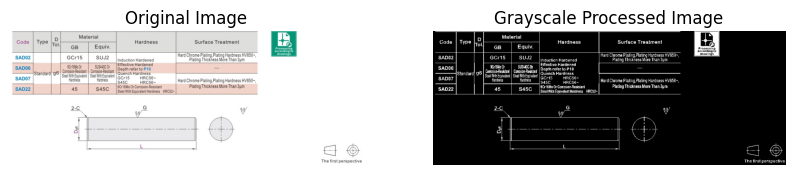

OCR Result: Material Cade Type Hardness Surface Treatment Tol_ GB Equiv. ptoge5 9 according drawinog SADOZ GCr15 SUJ2 Hard Chrome Plating Plating Hardness IVBSU Induction Hardened Thickness More Than Sum Effective Hardened SADO6 ICtIBHa Or SU540C @t refer to P1l Cwnosion-Resstan Cenosidn-Resistanl  Standardk 96 Quench Hardness SADO7 Stee] Wrh Equiyalart | Steel With Equ valen: GCr15 HRC56~ Hardness Hardness 545C HRC56 Hard Chrome Plating Plating Hardness HVBSD- 9Cr18Ha Or Corrosion-Resistant Thicknass More Than Spm SAD22 45 S45C Steel With Equivalent Hardness  HRCEZ  2C The first perspective Plating Depth = Plating
---
Text: Selection table
Text: Selection table
Image Found: https://image.yhdfa.vn//Image/Goods/A01/SAD01-22-C1.jpg


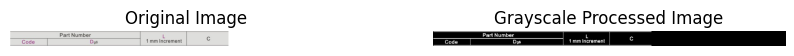

OCR Result: Part Number Code Do8 mm Increment
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


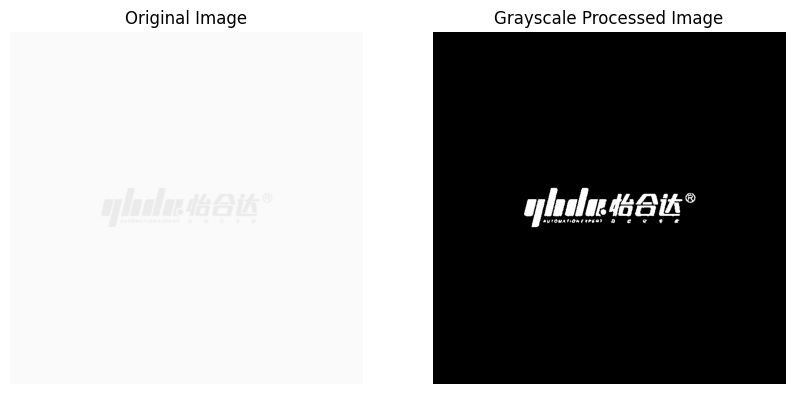

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


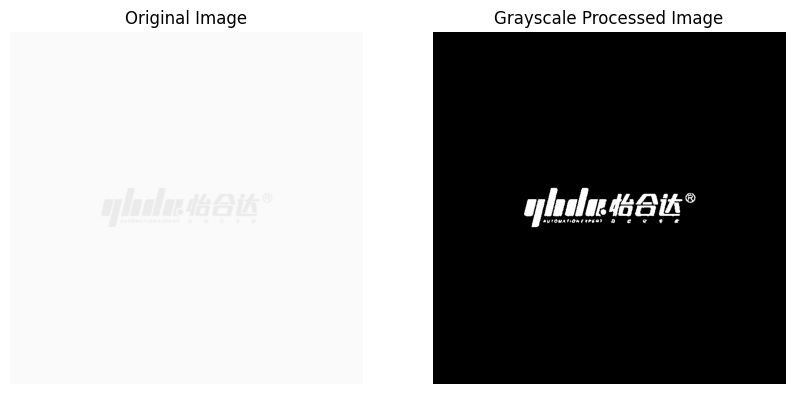

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


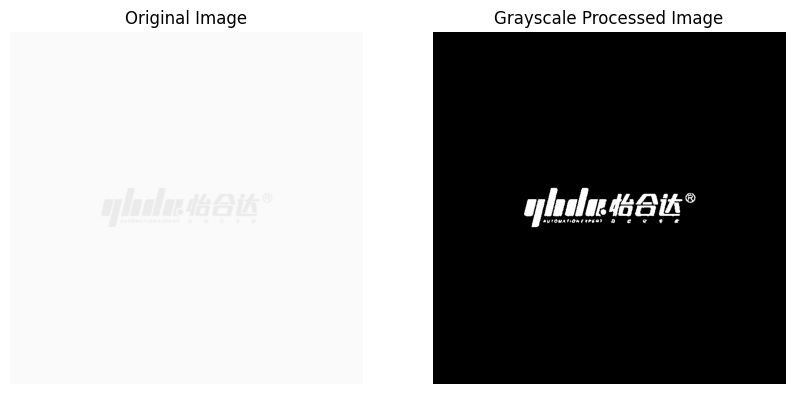

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


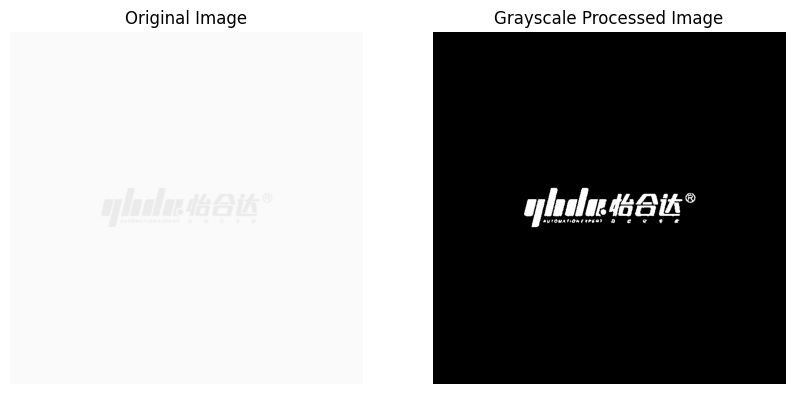

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


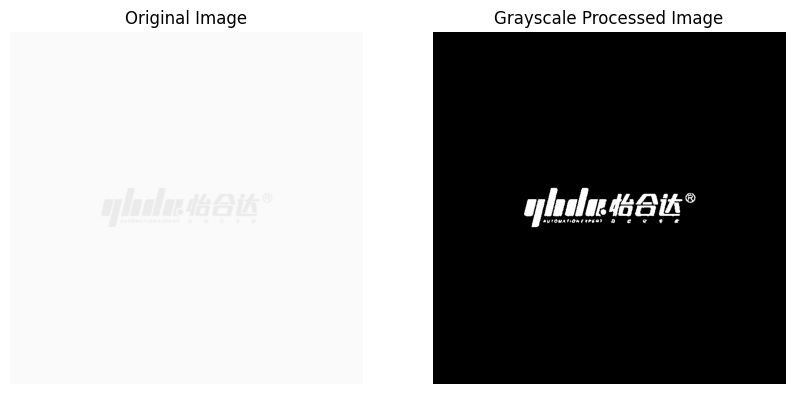

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


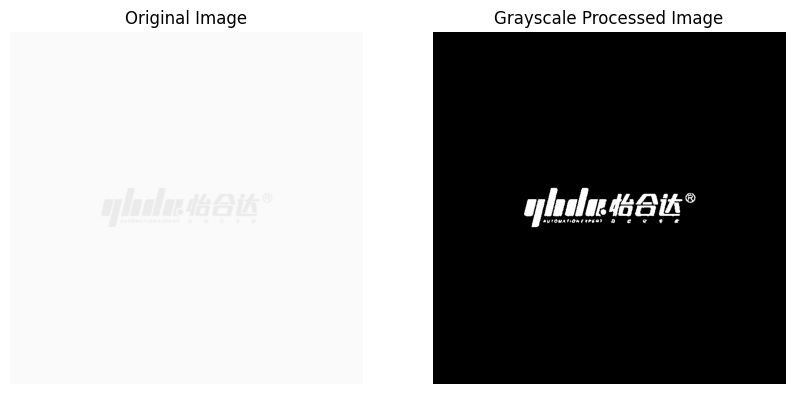

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


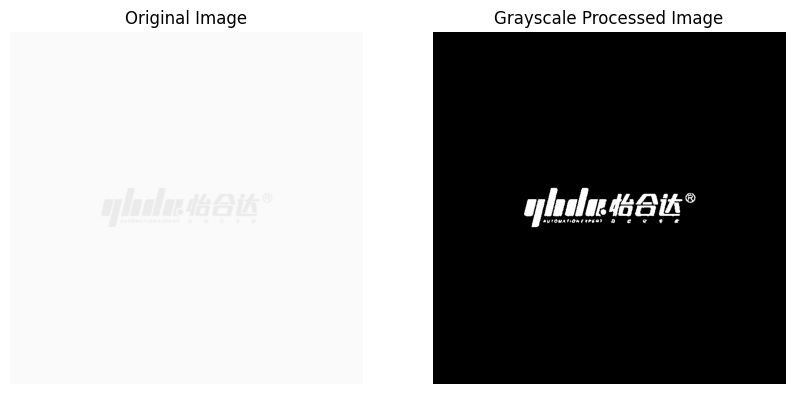

OCR Result: 'lslukt68it
---
Image Found: https://dgyhdzdhgfyxgs2.qiyukf.net/c34388296018033e0080c5437150d742.png


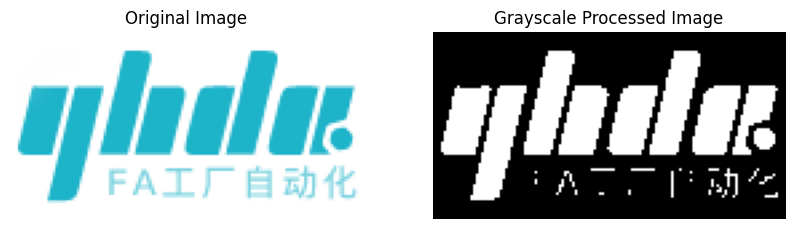

OCR Result: Yghtlge 4J"
---
Image Found: https://qiyukf.nosdn.127.net/sdk/res/kefu/custom/1.png


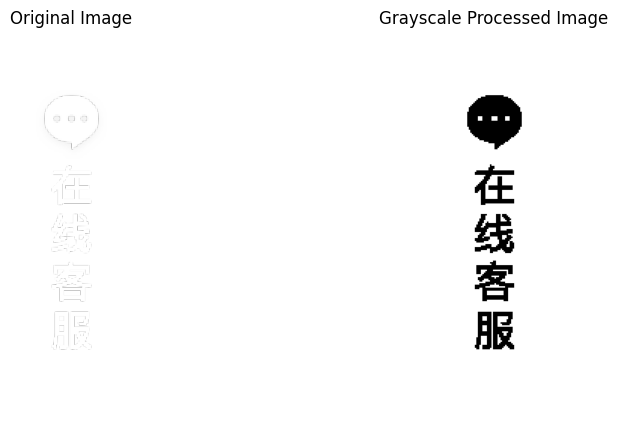

OCR Result: 1
---
Image Found: https://qiyukf.nosdn.127.net/sdk/res/kefu/custom/1.png


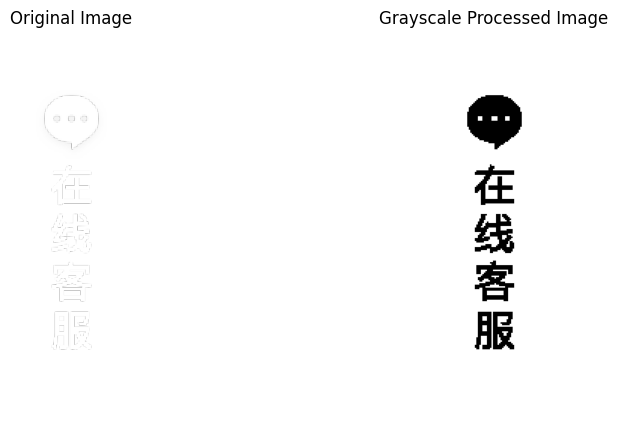

OCR Result: 1
---


In [15]:
# Function to scrape and process content
def scrape_content_in_order(url):
    try:
        driver.get(url)

        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.TAG_NAME, "body"))
        )

        # Get all text and images in DOM order
        body = driver.find_element(By.TAG_NAME, "body")
        elements = body.find_elements(By.XPATH, ".//*")

        for element in elements:
            # Handle text elements
            if element.tag_name in ['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'span', 'div']:
                text_content = element.text.strip()
                if text_content:
                    print(f"Text: {text_content}")

            # Handle image elements
            elif element.tag_name == 'img':
                image_url = element.get_attribute("src")
                if image_url:
                    print(f"Image Found: {image_url}")
                    ocr_result = process_and_display_image(image_url)
                    print(f"OCR Result: {ocr_result}\n---")

    finally:
        driver.quit()

url = "https://www.yhdfa.vn/product/E/A01/SAD01-22?productModel="
scrape_content_in_order(url)

## more test (another url)

Text: Tel: (84) 0987-918-001 Email: vn@dgyiheda.com Mon-Fir 7 am- 5 pm
Sign In
Register
Cart
0
Help
Down
Timing Pulley
Timing Belt
Screw
Single Axis Driver
Product category
REASONS FOR CHOOSING US
51,775.58M²
MANUFACTURING BASE
1
ONT-STOP SHOP PLATFORM
280+
ADVANCED PATENT
3000+
NUMBER OF EMPLOYEES
Serving customers
40,000+
Delivery within 3 days
90%
Product categories
90W+
Product category (number)
197+
01 - THE SOUL OF THE ENTERPRISE
CORPORATE CULTURE
CORPORATE MISSION
To systematically reduce the cost of automation equipment and promote the technological progress of automation industry.
CORPORATE VISION
To promote intelligent manufacturing to empower global automation industry.
CORE VALUE
To make customers moved, employees delighted, shareholders satisfied, and society respect!
Play Video
02 - THE BASIC INFORMATION
COMPANY PROFILES
Dongguan Yiheda Automation Co., LTD., founded in 2010, specializes in the research and development, production and sales of automation components, provid

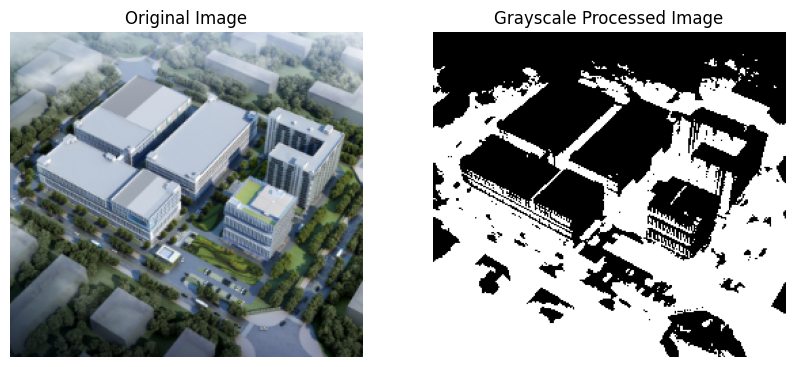

OCR Result: 
---
Text: 1
ONT-STOP SHOP PLATFORM
Text: 1
Text: ONT-STOP SHOP PLATFORM
Image Found: https://www.yhdfa.vn/_nuxt/img/c2.fd9358b.png


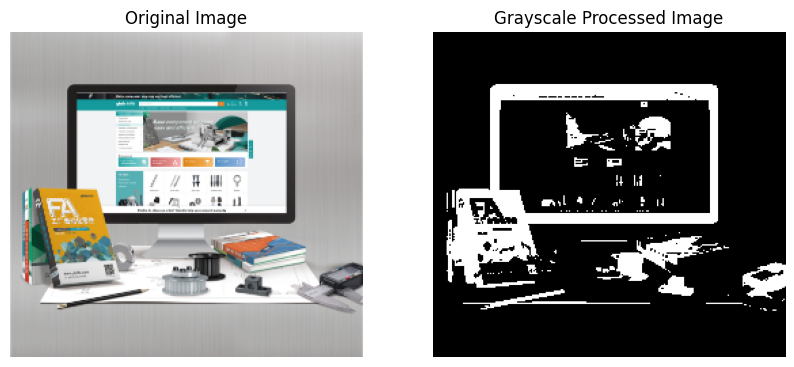

OCR Result: 
---
Text: 280+
ADVANCED PATENT
Text: 280+
Text: ADVANCED PATENT
Image Found: https://www.yhdfa.vn/_nuxt/img/c3.9c48aca.png


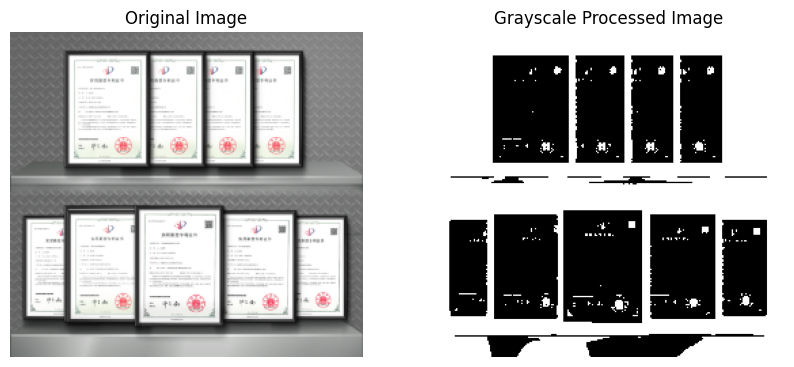

OCR Result: 
---
Text: 3000+
NUMBER OF EMPLOYEES
Text: 3000+
Text: NUMBER OF EMPLOYEES
Image Found: https://www.yhdfa.vn/_nuxt/img/c4.50f0404.png


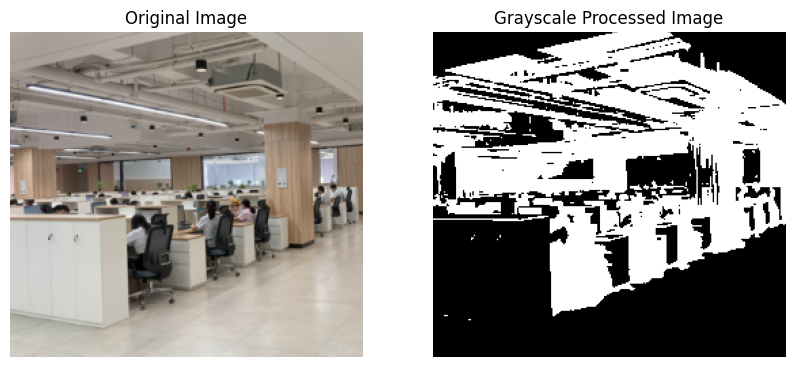

OCR Result: 
---
Text: Serving customers
40,000+
Delivery within 3 days
90%
Product categories
90W+
Product category (number)
197+
Text: Serving customers
40,000+
Delivery within 3 days
90%
Product categories
90W+
Product category (number)
197+
Text: Serving customers
40,000+
Text: Serving customers
40,000+
Text: Serving customers
Text: 40,000+
Text: Delivery within 3 days
90%
Text: Delivery within 3 days
90%
Image Found: https://www.yhdfa.vn/_nuxt/img/m1.582bc3f.png


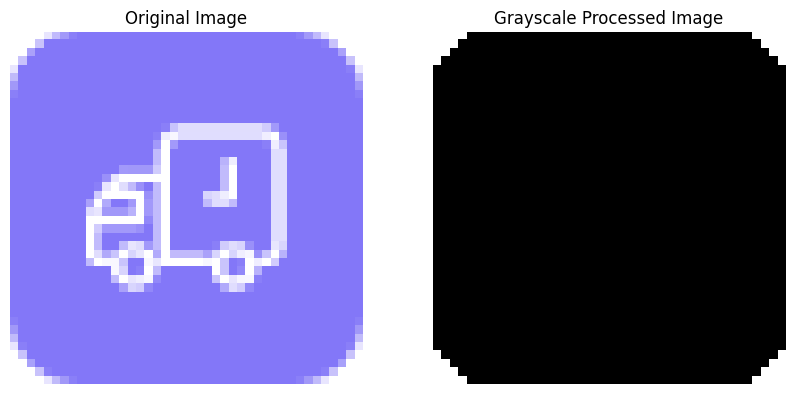

OCR Result: 
---
Text: Delivery within 3 days
90%
Text: Delivery within 3 days
Text: 90%
Text: Product categories
90W+
Text: Product categories
90W+
Image Found: 
OCR Result: Error processing image : No connection adapters were found for ''
---
Text: Product categories
90W+
Text: Product categories
Text: 90W+
Text: Product category (number)
197+
Text: Product category (number)
197+
Image Found: https://www.yhdfa.vn/_nuxt/img/m3.71296d4.png

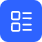
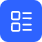
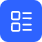

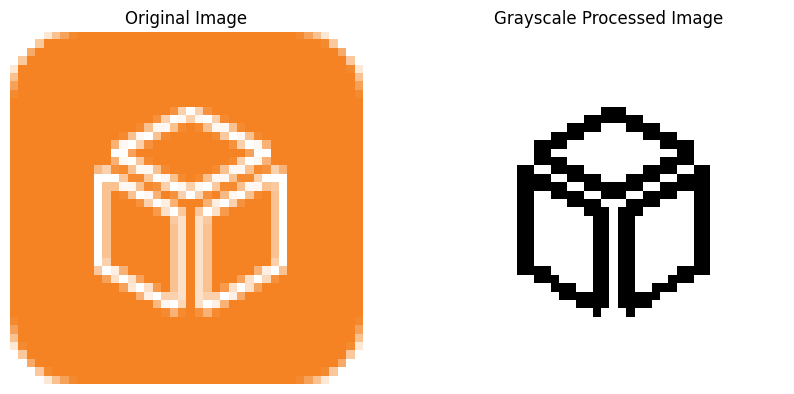

OCR Result: 
---
Text: Product category (number)
197+
Text: Product category (number)
Text: 197+
Text: 01 - THE SOUL OF THE ENTERPRISE
CORPORATE CULTURE
CORPORATE MISSION
To systematically reduce the cost of automation equipment and promote the technological progress of automation industry.
CORPORATE VISION
To promote intelligent manufacturing to empower global automation industry.
CORE VALUE
To make customers moved, employees delighted, shareholders satisfied, and society respect!
Text: 01 - THE SOUL OF THE ENTERPRISE
CORPORATE CULTURE
CORPORATE MISSION
To systematically reduce the cost of automation equipment and promote the technological progress of automation industry.
CORPORATE VISION
To promote intelligent manufacturing to empower global automation industry.
CORE VALUE
To make customers moved, employees delighted, shareholders satisfied, and society respect!
Text: 01 - THE SOUL OF THE ENTERPRISE
CORPORATE CULTURE
CORPORATE MISSION
To systematically reduce the cost of automation e

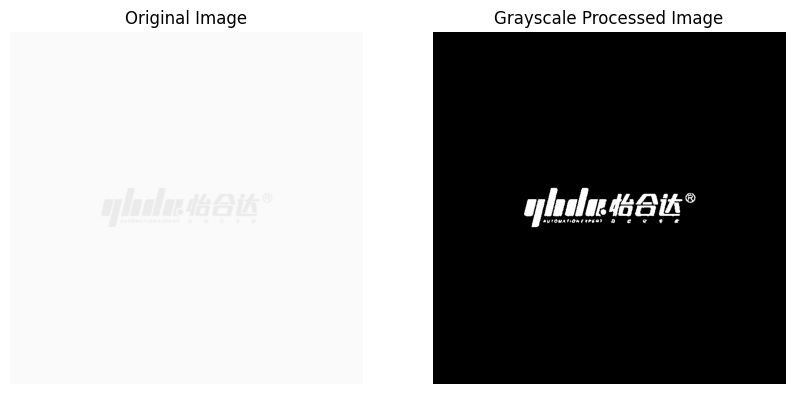

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


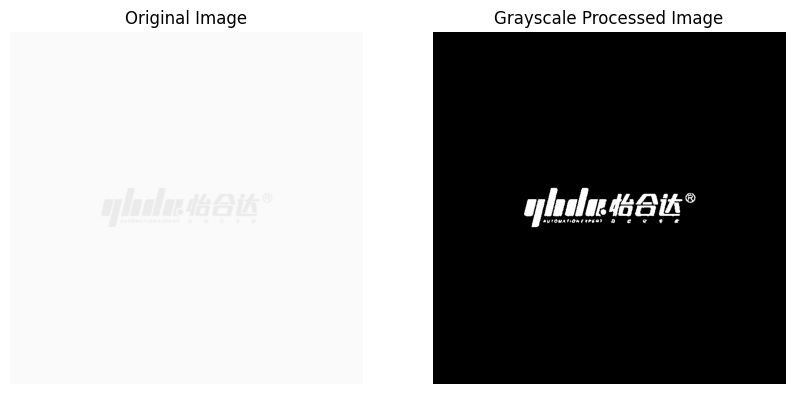

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


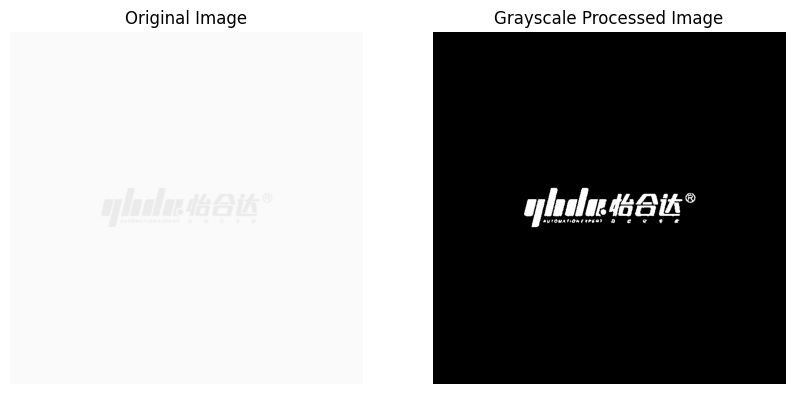

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


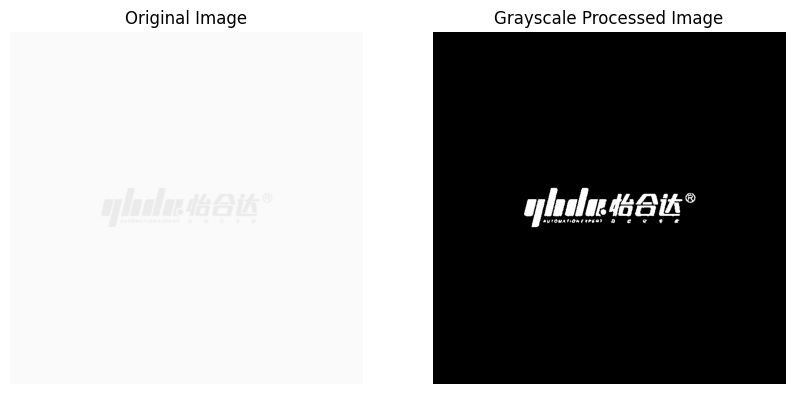

OCR Result: 'lslukt68it
---
Image Found: https://www.yhdfa.vn/_nuxt/img/productDefault.8c298ed.jpg


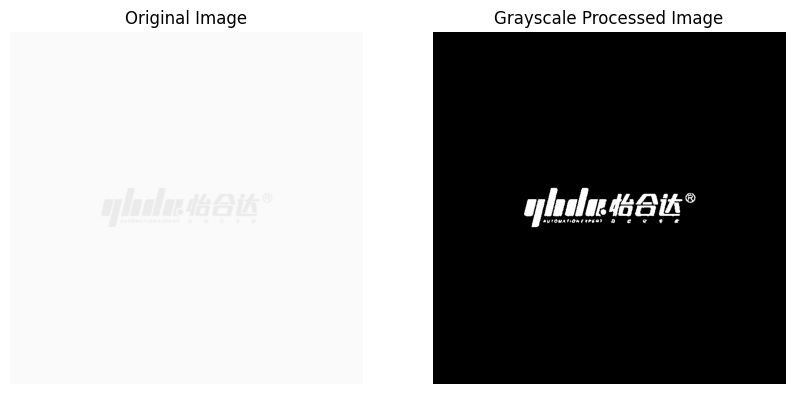

OCR Result: 'lslukt68it
---
Text: Online Resources
Text: News
Text: Products
Text: Electronic Catalog
Text: 3D Model Database
Text: Copyright © 2010-2025 YIHEDA All Rights Reserved.
Image Found: https://dgyhdzdhgfyxgs2.qiyukf.net/c34388296018033e0080c5437150d742.png


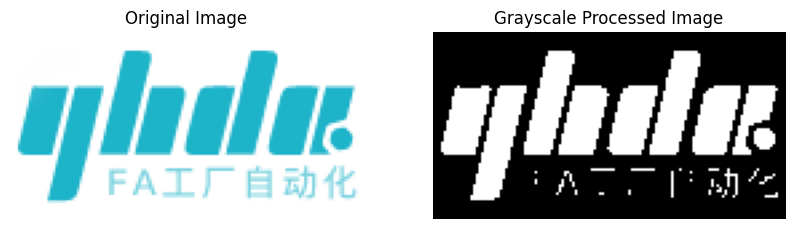

OCR Result: Yghtlge 4J"
---
Image Found: https://qiyukf.nosdn.127.net/sdk/res/kefu/custom/1.png


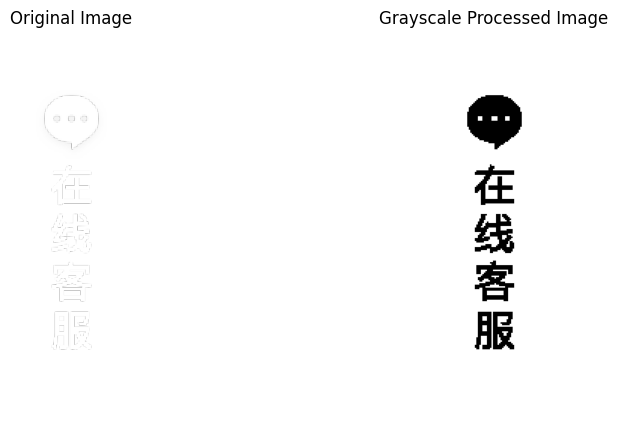

OCR Result: 1
---
Image Found: https://qiyukf.nosdn.127.net/sdk/res/kefu/custom/1.png


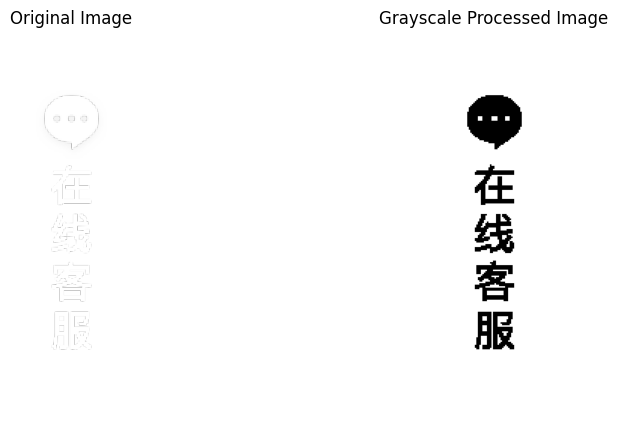

OCR Result: 1
---


In [17]:
def scrape_content_in_order2(url):
    try:
        driver.get(url)
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.TAG_NAME, "body"))
        )

        # Get all text and images in DOM order
        body = driver.find_element(By.TAG_NAME, "body")
        elements = body.find_elements(By.XPATH, ".//*")

        for element in elements:
            # Handle text elements
            if element.tag_name in ['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'span', 'div']:
                text_content = element.text.strip()
                if text_content:
                    print(f"Text: {text_content}")

            # Handle image elements
            elif element.tag_name == 'img':
                image_url = element.get_attribute("src")
                if image_url:
                    print(f"Image Found: {image_url}")
                    ocr_result = process_and_display_image(image_url)
                    print(f"OCR Result: {ocr_result}\n---")

    finally:
        driver.quit()

url = "https://www.yhdfa.vn/about-us"
scrape_content_in_order2(url)